In [1]:
dir_data = "C:/Users/ysp/Desktop/Deep Learning/dataset1"
dir_seg = dir_data + "/annotations_prepped_train/"
dir_img = dir_data + "/images_prepped_train/"

In [2]:
import glob, os
all_img_paths = glob.glob(os.path.join(dir_img, '*.png'))
all_img_paths[:5]

['C:/Users/ysp/Desktop/Deep Learning/dataset1/images_prepped_train\\0001TP_006690.png',
 'C:/Users/ysp/Desktop/Deep Learning/dataset1/images_prepped_train\\0001TP_006720.png',
 'C:/Users/ysp/Desktop/Deep Learning/dataset1/images_prepped_train\\0001TP_006750.png',
 'C:/Users/ysp/Desktop/Deep Learning/dataset1/images_prepped_train\\0001TP_006780.png',
 'C:/Users/ysp/Desktop/Deep Learning/dataset1/images_prepped_train\\0001TP_006810.png']

In [3]:
import glob, os
all_mask_paths = glob.glob(os.path.join(dir_seg, '*.png'))
all_mask_paths[:5]

['C:/Users/ysp/Desktop/Deep Learning/dataset1/annotations_prepped_train\\0001TP_006690.png',
 'C:/Users/ysp/Desktop/Deep Learning/dataset1/annotations_prepped_train\\0001TP_006720.png',
 'C:/Users/ysp/Desktop/Deep Learning/dataset1/annotations_prepped_train\\0001TP_006750.png',
 'C:/Users/ysp/Desktop/Deep Learning/dataset1/annotations_prepped_train\\0001TP_006780.png',
 'C:/Users/ysp/Desktop/Deep Learning/dataset1/annotations_prepped_train\\0001TP_006810.png']

In [4]:
all_img_paths[0].split('\\')[-1]

'0001TP_006690.png'

In [5]:
x = []
y = []
count = 0

In [6]:
import cv2
for i in range(len(all_img_paths)):
  img = cv2.imread(all_img_paths[i])
  img = cv2.resize(img,(224,224))
  mask_path = dir_seg+all_img_paths[i].split('\\')[-1]
  img_mask = cv2.imread(mask_path)
  img_mask = cv2.resize(img_mask,(224,224))
  x.append(img)
  y.append(img_mask)
  if(i%100==0):
    print(i)

0
100
200
300


In [7]:
import numpy as np
np.array(y).shape

(367, 224, 224, 3)

In [8]:
np.array(x).shape

(367, 224, 224, 3)

(array([82797.,  2079., 19554., 11745.,  2472.,  5469.,   393., 14874.,
         2094.,  9051.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

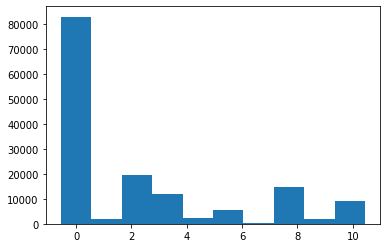

In [10]:
import matplotlib.pyplot as plt
x = np.array(x)
y = np.array(y)
plt.hist(y[2].flatten(),align='left')

In [34]:
y1 = np.where(y==8,1.,0.)
y1.shape

(367, 224, 224, 3)

In [35]:
y.shape

(367, 224, 224, 3)

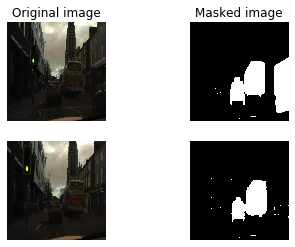

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x[1])
plt.axis('off')
plt.title('Original image')
plt.grid('off')
plt.subplot(222)
plt.imshow(y1[1])
plt.axis('off')
plt.title('Masked image')
plt.grid('off')
plt.subplot(223)
plt.imshow(x[2])
plt.axis('off')
plt.grid('off')
plt.subplot(224)
plt.imshow(y1[2])
plt.axis('off')
plt.grid('off')
plt.show()

(array([1.0824e+04, 1.3260e+03, 6.3000e+01, 5.8500e+03, 3.0000e+00,
        1.8000e+01, 1.8000e+01, 1.8000e+01, 1.2000e+01, 4.6800e+02]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

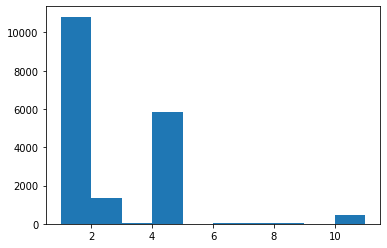

In [14]:
plt.hist(y[2,100:,:50].flatten())

In [15]:
x = np.array(x)
y2 = np.array(y1)[:,:,:,0]
y2 = y2.reshape(y2.shape[0],y2.shape[1],y2.shape[2],1)
print(x.shape, y2.shape)

(367, 224, 224, 3) (367, 224, 224, 1)


In [16]:
x = x/255
print(np.max(x))

1.0


In [17]:
from keras.applications.vgg16 import VGG16
base_vgg16 = VGG16(input_shape =  (224,224,3), include_top = False, weights = 'imagenet')
base_vgg16.trainable = False
base_vgg16.summary()

Using TensorFlow backend.


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
from keras.layers import Input, Conv2D, MaxPooling2D,UpSampling2D, Dropout, concatenate, BatchNormalization
from keras.optimizers import Adam
from keras.models import Model

In [19]:
conv1 = Model(inputs=base_vgg16.input,outputs=base_vgg16.get_layer('block1_conv2').output).output
conv2 = Model(inputs=base_vgg16.input,outputs=base_vgg16.get_layer('block2_conv2').output).output
conv3 = Model(inputs=base_vgg16.input,outputs=base_vgg16.get_layer('block3_conv3').output).output
conv4 = Model(inputs=base_vgg16.input,outputs=base_vgg16.get_layer('block4_conv3').output).output
drop4 = Dropout(0.5)(conv4)
conv5 = Model(inputs=base_vgg16.input,outputs=base_vgg16.get_layer('block5_conv3').output).output
drop5 = Dropout(0.5)(conv5)

In [20]:
up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(UpSampling2D(size =(2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = -1)

conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv6)
conv6 = BatchNormalization()(conv6)
up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(UpSampling2D(size =(2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = -1)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv7)
conv7 = BatchNormalization()(conv7)
up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(UpSampling2D(size =(2,2))(conv7))
merge8 = concatenate([conv2,up8],axis = -1)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv8)
conv8 = BatchNormalization()(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(UpSampling2D(size =(2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = -1)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer='he_normal')(conv9)
conv9 = BatchNormalization()(conv9)

conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

In [21]:
model = Model(input = base_vgg16.input, output = conv10)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

C:\Users\ysp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


In [22]:
for layer in model.layers[:18]:
  layer.trainable = False

In [23]:
model.compile(optimizer=Adam(1e-3, decay = 1e-6), 
                   loss='binary_crossentropy', metrics = ['accuracy'])

In [24]:
history = model.fit(x,y2,epochs=10,batch_size=1,validation_split=0.1)

Train on 330 samples, validate on 37 samples
Epoch 1/10
330/330 [==============================] - 319s 968ms/step - loss: 0.2721 - accuracy: 0.9266 - val_loss: 0.0851 - val_accuracy: 0.9834
Epoch 2/10
330/330 [==============================] - 320s 969ms/step - loss: 0.1159 - accuracy: 0.9566 - val_loss: 0.0991 - val_accuracy: 0.9690
Epoch 3/10
330/330 [==============================] - 318s 965ms/step - loss: 0.0957 - accuracy: 0.9656 - val_loss: 0.0608 - val_accuracy: 0.9852
Epoch 4/10
330/330 [==============================] - 318s 965ms/step - loss: 0.0788 - accuracy: 0.9738 - val_loss: 0.1318 - val_accuracy: 0.9671
Epoch 5/10
330/330 [==============================] - 318s 965ms/step - loss: 0.0670 - accuracy: 0.9786 - val_loss: 0.0740 - val_accuracy: 0.9829
Epoch 6/10
330/330 [==============================] - 319s 966ms/step - loss: 0.0532 - accuracy: 0.9835 - val_loss: 0.0904 - val_accuracy: 0.9790
Epoch 7/10
330/330 [==============================] - 319s 966ms/step - loss: 0

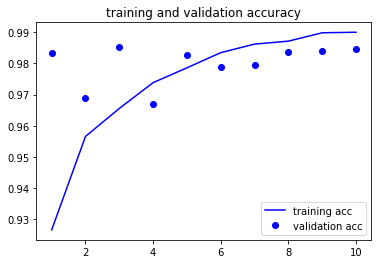

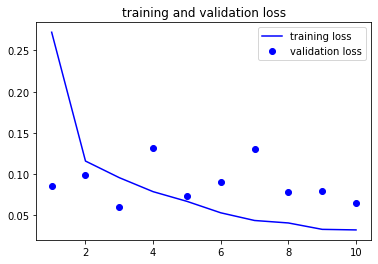

In [26]:
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b',label='training acc')
plt.plot(epochs,val_acc,'bo',label='validation acc')
plt.title('training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'b',label='training loss')
plt.plot(epochs,val_loss,'bo',label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()

In [27]:

y_pred = model.predict(x[-2:])
#np.mean(y_predi == y_testi)

In [28]:
y_pred.shape

(2, 224, 224, 1)

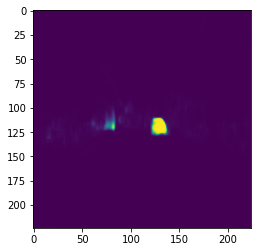

In [29]:
plt.imshow(y_pred[-1,:,:,0])

In [30]:
y2.shape

(367, 224, 224, 1)

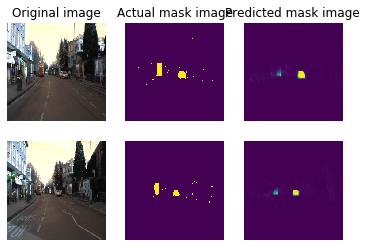

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(231)
plt.imshow(x[-1])
plt.axis('off')
plt.title('Original image')
plt.grid('off')
plt.subplot(232)
plt.imshow(y2[-1,:,:,0])
plt.axis('off')
plt.title('Actual mask image')
plt.grid('off')
plt.subplot(233)
plt.imshow(y_pred[-1,:,:,0])
plt.axis('off')
plt.title('Predicted mask image')
plt.grid('off')
plt.subplot(234)
plt.imshow(x[-2])
plt.axis('off')
plt.grid('off')
plt.subplot(235)
plt.imshow(y2[-2,:,:,0])
plt.axis('off')
plt.grid('off')
plt.subplot(236)
plt.imshow(y_pred[-2,:,:,0])
plt.axis('off')
plt.grid('off')
plt.show()

In [32]:
from keras.utils import plot_model

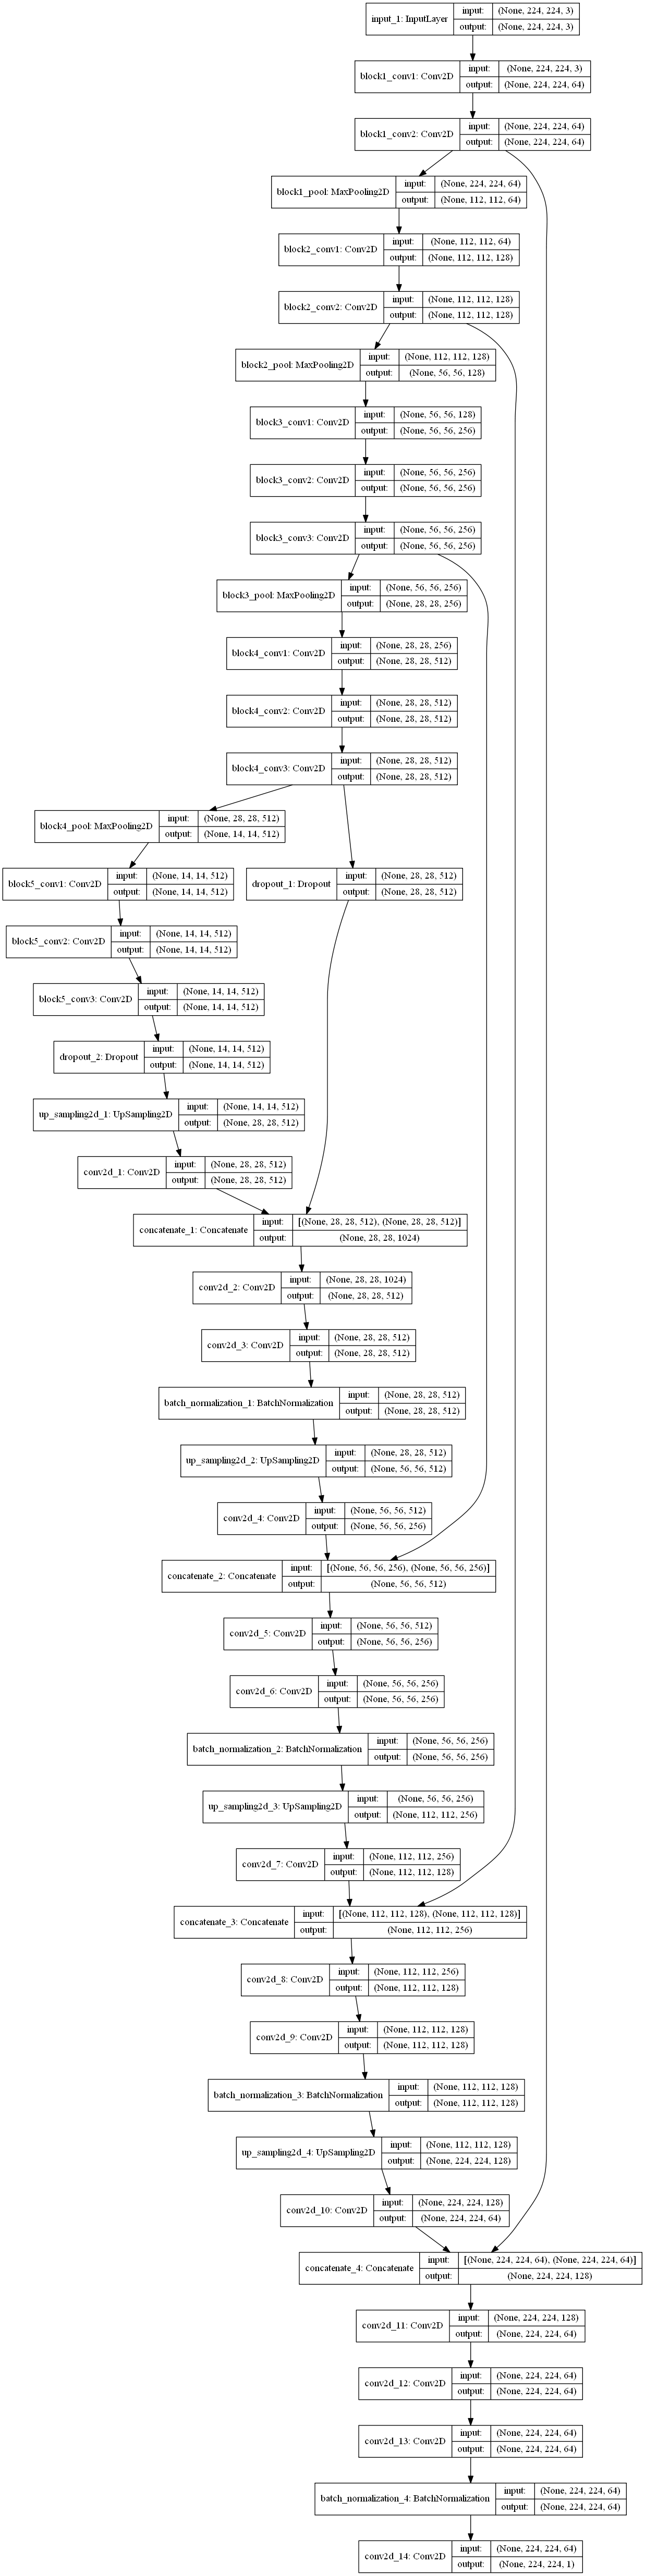

In [33]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

3